In [4]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving train_data.csv to train_data.csv


In [38]:
df = pd.read_csv('train_data.csv')
X = df.drop(columns=['diagnosis']).to_numpy().T
y = df['diagnosis'].to_numpy().reshape(-1, 1).T

y_one_hot = []
for label in y.flatten():
    if label == 0:
        y_one_hot.append([1, 0])
    elif label == 1:
        y_one_hot.append([0, 1])
y = np.array(y_one_hot).T

print(y)
print(y.shape)
print(X)
print(X.shape)

[[0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1
  1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1
  0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1
  0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1
  0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0
  0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1
  1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0
  0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1
  0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1
  1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1
  1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0
  1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1
  1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0]
 [1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0

In [39]:
def sigmoid(z, derivative=False):
    if derivative:
        return z * (1 - z)
    return 1 / (1 + np.exp(-z))

In [97]:
def softmax(Z):

    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return e_Z / np.sum(e_Z, axis=0, keepdims=True)

In [41]:
def network_archi(X, y):
    n_input = X.shape[0]
    n_output = y.shape[0]
    n_hidden1 = 24
    n_hidden2 = 24
    return n_input, n_hidden1, n_hidden2, n_output

print(network_archi(X, y))

(30, 24, 24, 2)


In [88]:
def define_model(X, y):
    n_input, n_hidden1, n_hidden2, n_output = network_archi(X, y)

    W1 = np.random.randn(n_hidden1, n_input) * 0.01
    b1 = np.zeros((n_hidden1, 1))
    W2 = np.random.randn(n_hidden2, n_hidden1) * 0.01
    b2 = np.zeros((n_hidden2, 1))
    W3 = np.random.randn(n_output, n_hidden2) * 0.01
    b3 = np.zeros((n_output, 1))

    parameters = {'W1': W1, 'b1': b1,
                  'W2': W2, 'b2': b2,
                  'W3': W3, 'b3': b3}
    return parameters

params = define_model(X, y)
print(params)


{'W1': array([[ 9.49554135e-03, -1.48489797e-02, -2.55392113e-02,
         9.34319911e-03, -1.36687870e-02, -2.24765402e-03,
        -1.17011303e-02, -1.80198044e-02,  5.41462728e-03,
         7.59155160e-03, -5.76510401e-03, -2.59104229e-02,
        -5.46244448e-03,  3.91804005e-03, -1.47891157e-02,
         1.83359920e-03, -1.53098492e-04,  5.79291500e-03,
         1.19580368e-03, -9.73068941e-03,  1.19657150e-02,
        -1.58529573e-03, -2.73045395e-04, -9.33267959e-03,
        -4.43282251e-03, -8.84802714e-03, -1.72946060e-03,
         1.71170848e-02, -1.37190114e-02, -1.61356140e-02],
       [ 1.47117033e-02, -2.09323677e-03, -6.69072739e-03,
         1.03990469e-02, -6.05615540e-03,  1.82600971e-02,
         6.77925871e-03, -4.87911408e-03,  2.15730821e-02,
        -6.05714923e-03,  7.42095372e-03,  2.99292580e-03,
         1.30174129e-02,  1.56151120e-02,  3.20041491e-04,
        -7.53417870e-03,  4.59972143e-03, -6.77715370e-03,
         2.01338725e-02,  1.36535331e-03, -3.653

In [59]:
def forward_propagation(X, parameters):
    W1, b1 = parameters['W1'], parameters['b1']
    W2, b2 = parameters['W2'], parameters['b2']
    W3, b3 = parameters['W3'], parameters['b3']

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1) #1 / (1 + np.exp(-z1))
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2) #1 / (1 + np.exp(-z2))
    Z3 = np.dot(W3, A2) + b3
    A3 = softmax(Z3) #1 / (1 + np.exp(-z3))

    cache = {'Z1': Z1, 'A1': A1,
             'Z2': Z2, 'A2': A2,
             'Z3': Z3, 'A3': A3}
    shape = {'Z1': Z1.shape, 'A1': A1.shape,
             'Z2': Z2.shape, 'A2': A2.shape,
             'Z3': Z3.shape, 'A3': A3.shape}
    return cache, shape

In [60]:
cache, shapes = forward_propagation(X, params)
print(shapes)

def backward_propagation(X, y, parameters, cache):
    m = X.shape[1]
    n = X.shape[0]
    W1, b1 = parameters['W1'], parameters['b1']
    W2, b2 = parameters['W2'], parameters['b2']
    W3, b3 = parameters['W3'], parameters['b3']

    A1, A2, A3 = cache['A1'], cache['A2'], cache['A3']

    dZ3 = A3 - y
    dW3 = (1/m) * np.dot(dZ3, A2.T)
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)

    dZ2 = np.dot(W3.T, dZ3) * sigmoid(A2, derivative=True)
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * sigmoid(A1, derivative=True)
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)


    grads = {'dW3': dW3, 'db3': db3,
             'dW2': dW2, 'db2': db2,
             'dW1': dW1, 'db1': db1}
    return grads

def update_parameters(parameters, derivatives, learning_rate):
    W1, b1 = parameters['W1'], parameters['b1']
    W2, b2 = parameters['W2'], parameters['b2']
    W3, b3 = parameters['W3'], parameters['b3']

    dW1, db1 = derivatives['dW1'], derivatives['db1']
    dW2, db2 = derivatives['dW2'], derivatives['db2']
    dW3, db3 = derivatives['dW3'], derivatives['db3']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3

    parameters = {'W1': W1, 'b1': b1,
                  'W2': W2, 'b2': b2,
                  'W3': W3, 'b3': b3}
    return parameters

{'Z1': (24, 455), 'A1': (24, 455), 'Z2': (24, 455), 'A2': (24, 455), 'Z3': (2, 455), 'A3': (2, 455)}


In [180]:
#calucler le model et update les parametrs
derivatives = backward_propagation(X, y, params, cache)
update = update_parameters(params, derivatives, 0.2)

In [150]:
def compute_cost(A3, Y):
    m = Y.shape[1]
    # Cross-Entropy formule
    cost = - (1/m) * np.sum(Y * np.log(A3 + 1e-8))
    return np.squeeze(cost) # S'assure que c'est un chiffre, pas un tableau

def compute_accuracy(A, Y):
    # A et Y sont de forme (2, 455)

    # On prend l'index du max (0 ou 1) pour chaque colonne
    predictions = np.argmax(A, axis=0)
    labels = np.argmax(Y, axis=0)

    # On compare : ça renvoie un tableau de True/False
    # np.mean calcule le pourcentage de True
    accuracy = np.mean(predictions == labels)

    return accuracy

In [181]:
def mlp(X, y, epochs=100):
  #init params
  input, n_h1, n_h2, output = network_archi(X, y)
  params = define_model(X, y)
  cost_history = []
  accuracy_history = []

  for i in range(epochs):
    #forward
    cache, shapes = forward_propagation(X, params)
    #error
    cost = compute_cost(cache['A3'], y)
    acc = compute_accuracy(cache['A3'], y)
    cost_history.append(cost)
    accuracy_history.append(acc)
    if acc > 0.99:
      print(f"Objectif atteint à l'époque {i} ! Arrêt anticipé.")
      break
    #backward
    derivatives = backward_propagation(X, y, params, cache)
    #update
    params = update_parameters(params, derivatives, 0.2)
    if i % 5 == 0:
        print(f"Epoch {i}: Cost = {cost:.4f} | Accuracy = {acc:.2%}")

  return params, cost_history, accuracy_history

Epoch 0: Cost = 0.7034 | Accuracy = 37.36%
Epoch 5: Cost = 0.6609 | Accuracy = 62.64%
Epoch 10: Cost = 0.6609 | Accuracy = 62.64%
Epoch 15: Cost = 0.6609 | Accuracy = 62.64%
Epoch 20: Cost = 0.6609 | Accuracy = 62.64%
Epoch 25: Cost = 0.6609 | Accuracy = 62.64%
Epoch 30: Cost = 0.6609 | Accuracy = 62.64%
Epoch 35: Cost = 0.6609 | Accuracy = 62.64%
Epoch 40: Cost = 0.6609 | Accuracy = 62.64%
Epoch 45: Cost = 0.6609 | Accuracy = 62.64%
Epoch 50: Cost = 0.6608 | Accuracy = 62.64%
Epoch 55: Cost = 0.6608 | Accuracy = 62.64%
Epoch 60: Cost = 0.6608 | Accuracy = 62.64%
Epoch 65: Cost = 0.6608 | Accuracy = 62.64%
Epoch 70: Cost = 0.6608 | Accuracy = 62.64%
Epoch 75: Cost = 0.6608 | Accuracy = 62.64%
Epoch 80: Cost = 0.6608 | Accuracy = 62.64%
Epoch 85: Cost = 0.6608 | Accuracy = 62.64%
Epoch 90: Cost = 0.6608 | Accuracy = 62.64%
Epoch 95: Cost = 0.6608 | Accuracy = 62.64%
Epoch 100: Cost = 0.6608 | Accuracy = 62.64%
Epoch 105: Cost = 0.6608 | Accuracy = 62.64%
Epoch 110: Cost = 0.6608 | Accur

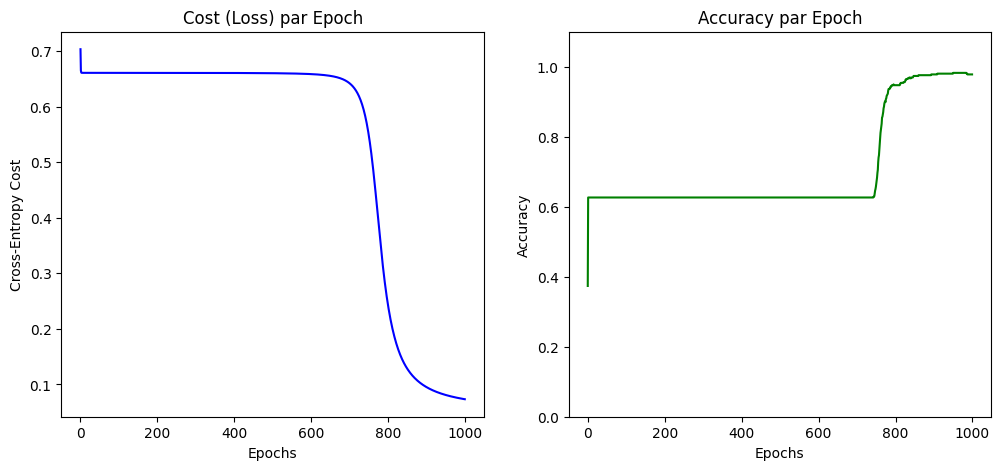

In [182]:
model, cost, acc = mlp(X, y, 1000)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graphique 1 : La Loss (Doit descendre)
ax1.plot(cost, color='blue')
ax1.set_title('Cost (Loss) par Epoch')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Cross-Entropy Cost')

# Graphique 2 : L'Accuracy (Doit monter)
ax2.plot(acc, color='green')
ax2.set_title('Accuracy par Epoch')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0, 1.1) # Pour fixer l'échelle entre 0 et 100%

plt.show()